# Tutorial 5
## Outline
* Auto-differentiation frameworks: tensorflow and pytorch
* Nomenclatures and general components of training a NN
* PyTorch Tensors
* Building an NN with pytorch


## Tenserflow vs PyTorch

* PyTorch is developed by Facebook
* TensorFlow is developed by Google. Keras is a front-end API of TensorFlow.

### Similarities
* Both are auto-differentiation framework
* Both are open source
* Both support CPU and GPU executions
* Both have a large and active community

### Dissimilarities
#### Graph structure
* Depending on version, TensorFlow is either static graph (version 1) or dynamic graph (version 2, with eager execution), but not as efficient as static graph
* PyTorch is completely dynamic graph, and is efficient (sometimes even more efficient than TF with static graph!)


#### Language support
* TensorFlow supports a large variety of languages, i.e. C++, JavaScript, Python, C#, Ruby, and Swift.
* PyTorch only supports python

#### Deployment
* Tensorflow can be easily deployed into different platforms, including mobile devices!
* PyTorch code has to be converted into a different framework for depolyment

### General suggestions
* TensorFlow (with Keras) is easier to use for trying out existing models on a new dataset with minimal modifications on the architecture
* It is also good for building simple models, like MLP networks 
* PyTorch is more useful in research, when you would like to try complicated NN architectures and needs to do a lot of debuggingg and validation of ideas, but do not care about deployment

## Nomenclatures and general components of training a NN
* **Epoch**: Going through training data once
* **Batch**: Set of data for calculating each gradient update
* **Batch size**: Size of data in a batch
* **Iteration**: One iteration = one gradient update
* **Learning rate**: Coefficient multiplied to the gradient in each update

### Neural network architecture
* Multiple layer perceptron (MLP)
* Convolutional neural network (CNN)
* Graph convolutional neural network (GCN)
* Recurrent neural network (RNN)
* AutoEncoder (AE) 
* Attention mechanism / Transformer 
* ...

### Optimizer
* SGD (SGDM)
* Adam
* RMSProp
* ...

### Loss function
* Mean squared error (MSE)
* Mean absolute error (MAE)
* Cosine similarity 
* Binary crossentropy (CE) 
* Categorical crossentropy
* ...

## PyTorch: Tensors

Here we introduce the most fundamental PyTorch concept: the **Tensor**. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

In [4]:
import torch
import numpy as np    

a = torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])
a.size()

torch.Size([3, 2])

In [5]:
a.reshape(-1) #np a.reshape(-1)

tensor([0.1000, 1.2000, 2.2000, 3.1000, 4.9000, 5.2000])

In [6]:
x = torch.linspace(-np.pi, 2, 20)
x

tensor([-3.1416, -2.8710, -2.6004, -2.3298, -2.0592, -1.7885, -1.5179, -1.2473,
        -0.9767, -0.7061, -0.4355, -0.1649,  0.1057,  0.3763,  0.6469,  0.9176,
         1.1882,  1.4588,  1.7294,  2.0000])

Convert numpy array to torch and vice versa

In [7]:
a = np.ones((3,2))
type(a)

numpy.ndarray

In [15]:
b = torch.tensor(a, dtype = torch.float64)
b

<ipython-input-15-36cef25c40ca>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(a, dtype = torch.float64)


tensor([[-0.2432, -0.5213, -0.7230],
        [-0.3826, -1.0240, -0.4013]], dtype=torch.float64)

In [16]:
# switch tensor back to numpy 
# detach first because you dont want gradient and stuff
b.detach().numpy()


array([[-0.24322969, -0.52131802, -0.72296548],
       [-0.38261956, -1.02399397, -0.40131524]])

Specify the device and data types for torch tensors

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# if torch.cuda.is_available():
#     torch.device("cuda:0")
# else: 
#     device = torch.device()
dtype = torch.float
a = torch.randn((2,3), device = device, dtype = dtype) #generate random array


In [18]:
a.to(torch.device("cpu"))

tensor([[ 0.7738, -0.0575,  0.2585],
        [-0.5845,  0.1591, -0.2642]])

## Building NN for regression task
For example, let's use a two hidden-layer MLP network [20, 15, 1] to simulate the Rosenbrock banana function!<br>
$f(x,y)=(1-x)^2+10(y-x^2)^2$<br>
$x\in[-2,2],y\in[-2,2]$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

def generate_X(number):
    xs=(np.random.random(number)*2-1)*2
    ys=(np.random.random(number)*2-1)*2
    return np.hstack([xs.reshape(-1,1),ys.reshape(-1,1)])
    
def generate_data(number,stochascity=0.05):
    X=generate_X(number)
    xs=X[:,0]
    ys=X[:,1]
    fs=(1-xs)**2+10*(ys-xs**2)**2
    stochastic_ratio=(np.random.random(number)*2-1)*stochascity+1
    return np.hstack([xs.reshape(-1,1),ys.reshape(-1,1)]),fs*stochastic_ratio

<IPython.core.display.Javascript object>


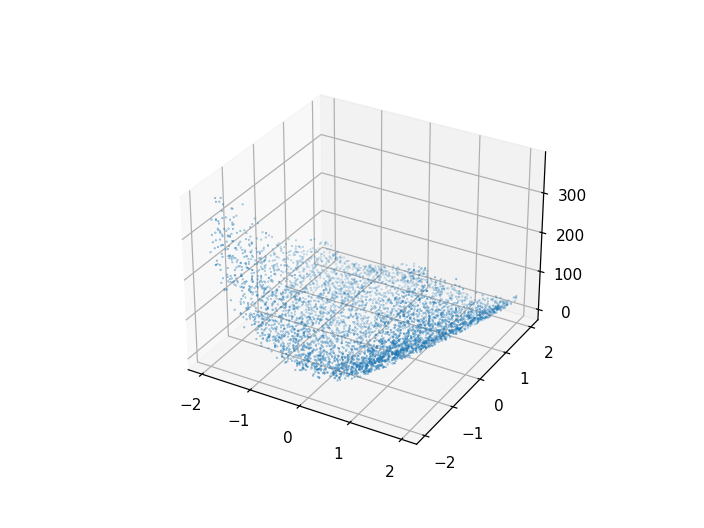

<ipython-input-20-f3e6de34cca8>:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [20]:
x, y = generate_data(5000, 0.3)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, s=0.1)

### Building a PyTorch model

In [21]:
from torch import nn
import torch

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 20),
            nn.ReLU(),
            nn.Linear(20, 15),
            nn.ReLU(),
            nn.Linear(15, 1)
        )
    def forward(self, x):
        return self.layers(x)
        

In [37]:
model = MLP()
weights = model.state_dict()
model.load_state_dict(weights)
weights
# print(model)

OrderedDict([('layers.0.weight',
              tensor([[-0.0526,  0.2531],
                      [-0.4910,  0.2204],
                      [ 0.7041,  0.5813],
                      [-0.5673, -0.2123],
                      [ 0.2877, -0.3625],
                      [-0.4251,  0.2606],
                      [-0.0219, -0.4055],
                      [ 0.3960, -0.3704],
                      [-0.2244,  0.5659],
                      [ 0.4352, -0.1748],
                      [ 0.3257, -0.4012],
                      [ 0.3298,  0.6703],
                      [ 0.1318,  0.4189],
                      [-0.4495, -0.6948],
                      [ 0.5127, -0.3074],
                      [ 0.3447,  0.4586],
                      [ 0.5613,  0.5585],
                      [-0.3695, -0.6953],
                      [-0.6797, -0.1400],
                      [-0.0871, -0.5853]])),
             ('layers.0.bias',
              tensor([ 0.5481, -0.1754,  0.6189, -0.1287,  0.5114,  0.1910, -0.6104,  0.2008,

In [38]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

best_loss = float('inf')
best_weight = {}

for i in range(100):
    train_X, train_y = generate_data(128, stochascity=0.1)
    train_X = torch.tensor(train_X, dtype=torch.float)
    train_y = torch.tensor(train_y, dtype=torch.float)
    pred = model(train_X) 
    loss = loss_func(pred, train_y.reshape(-1, 1))
    optimizer.zero_grad() # very important to zero the gradient 
    loss.backward() # do the backpropagation by itself
    optimizer.step() # update the weights with the parameters we feed in
    if loss.item() < best_loss:
        best_weights = model.state_dict()
        best_loss = loss.item()
    
    print("Iteration %d: Loss value - %.4f" % (i + 1, loss.item()))
    
model.load_state_dict(best_model)

Iteration 1: Loss value - 6849.8633
Iteration 2: Loss value - 4406.5273
Iteration 3: Loss value - 7108.0342
Iteration 4: Loss value - 5565.6030
Iteration 5: Loss value - 8075.0771
Iteration 6: Loss value - 6374.1021
Iteration 7: Loss value - 7545.7393
Iteration 8: Loss value - 4717.2100
Iteration 9: Loss value - 5296.3872
Iteration 10: Loss value - 6100.3359
Iteration 11: Loss value - 4724.2417
Iteration 12: Loss value - 7872.9917
Iteration 13: Loss value - 6119.3975
Iteration 14: Loss value - 5449.2847
Iteration 15: Loss value - 7992.3301
Iteration 16: Loss value - 8069.8022
Iteration 17: Loss value - 6329.4141
Iteration 18: Loss value - 4039.1519
Iteration 19: Loss value - 6878.0522
Iteration 20: Loss value - 8894.6289
Iteration 21: Loss value - 7079.2236
Iteration 22: Loss value - 7222.6221
Iteration 23: Loss value - 5648.2500
Iteration 24: Loss value - 6902.3843
Iteration 25: Loss value - 4151.6016
Iteration 26: Loss value - 4176.1230
Iteration 27: Loss value - 5828.9492
Iteration 

NameError: name 'best_model' is not defined

<IPython.core.display.Javascript object>


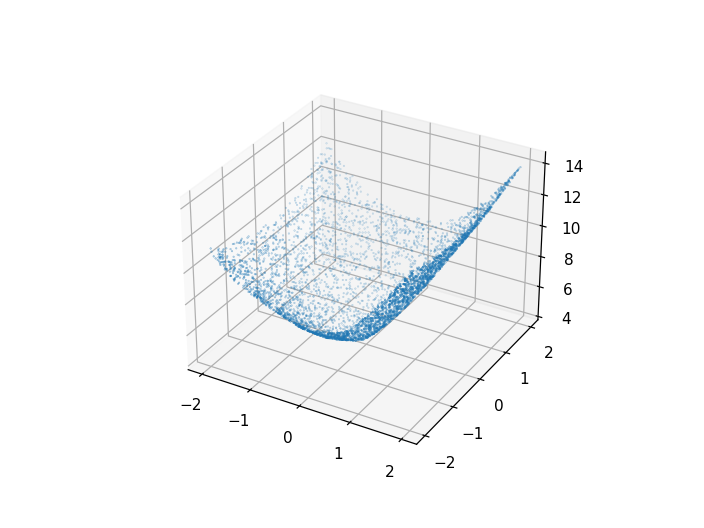

<ipython-input-35-d917d3b985ce>:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


In [35]:
new_X = generate_X(5000)
with torch.no_grad():
    new_y = model(torch.tensor(new_X, dtype = torch.float))
new_y = new_y.detach().numpy()
fig = plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_y, s=0.1)

<IPython.core.display.Javascript object>


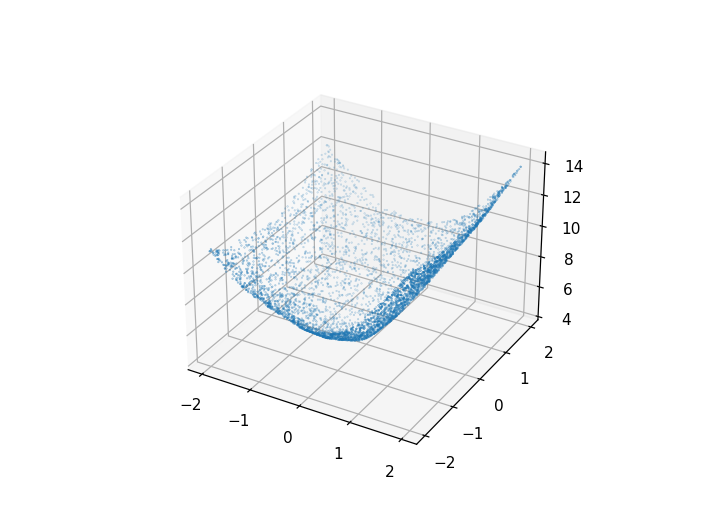

In [34]:
new_X = generate_X(5000)
with torch.no_grad():
    # everything inside will not run a gradient
    new_y = model(torch.tensor(new_X, dtype=torch.float))
new_y = new_y.detach().numpy()
fig = plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_y, s=0.1)